## TASK 1 - EDA of the current Sakila Database

### Defining a function for sending in SQL queries our database 

In [10]:
import duckdb

def query_sakila(query: str, duckdb_path = "data/sakila.duckdb"):
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query=query).df()

    return df


In [2]:
query_sakila("desc;")

,database,schema,name,column_names,column_types,temporary
0,sakila,staging,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,sakila,staging,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,sakila,staging,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,sakila,staging,actor,"[actor_id, first_name, last_name, last_update,...","[DECIMAL(38,9), VARCHAR, VARCHAR, TIMESTAMP, V...",False
4,sakila,staging,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
5,sakila,staging,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
6,sakila,staging,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",False
7,sakila,staging,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
8,sakila,staging,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
9,sakila,staging,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False


In [3]:
query_sakila("FROM staging.film;").columns

# in the film table we can observe that we get length, title columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update',
       '_dlt_load_id', '_dlt_id'],
      dtype='object')

### a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

In [4]:
# Movies that are longer than 180 minutes are listed below. there are total of 39 movies

query_sakila("""
    SELECT
             title,
             length
    
    FROM
             staging.film
             
    WHERE length > 180
    ORDER BY length;
    
""")

,title,length
0,LAWLESS VISION,181
1,WILD APOLLO,181
2,STAR OPERATION,181
3,RUNAWAY TENENBAUMS,181
4,ANALYZE HOOSIERS,181
5,HAUNTING PIANIST,181
6,LOVE SUICIDES,181
7,HOTEL HAPPINESS,181
8,INTRIGUE WORST,181
9,JACKET FRISCO,181


### b) Which movies have the word "love" in its title? Show the following columns
- title
- rating
- length
- description

In [5]:
# Movies that have the word "love" in its title with its rating, length and description

query_sakila("""
    SELECT
             title,
             rating,
             length,
             description
    
    FROM
             staging.film
             
    WHERE title ILIKE '%love%';
""")

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


### c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length

In [6]:
# Shortest, average, median and longest movie length

query_sakila("""
    SELECT
        MIN(length) as min_movie_length,
        ROUND(AVG(length)) as average_movie_length,
        MEDIAN(length) as median_movie_length,
        MAX(length) as max_movie_length
    FROM
             staging.film;
""")

,min_movie_length,average_movie_length,median_movie_length,max_movie_length
0,46,115.0,114.0,185


### d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can keep the movie. The Manager wants to know the 10 most expensive movies to rent per day.

In [7]:
# 10 most expensive movies to rent per day (in alphabetical order)
query_sakila("""
    SELECT
        title,
        rental_duration,
        rental_rate,
        rental_rate / rental_duration as daily_rental_cost
    FROM
        staging.film
    ORDER BY daily_rental_cost DESC,
             rental_rate DESC,
             title ASC;
""").head(10)

,title,rental_duration,rental_rate,daily_rental_cost
0,ACE GOLDFINGER,3,4.99,1.663333
1,AMERICAN CIRCUS,3,4.99,1.663333
2,AUTUMN CROW,3,4.99,1.663333
3,BACKLASH UNDEFEATED,3,4.99,1.663333
4,BEAST HUNCHBACK,3,4.99,1.663333
5,BEHAVIOR RUNAWAY,3,4.99,1.663333
6,BILKO ANONYMOUS,3,4.99,1.663333
7,CARIBBEAN LIBERTY,3,4.99,1.663333
8,CASPER DRAGONFLY,3,4.99,1.663333
9,CASUALTIES ENCINO,3,4.99,1.663333


### e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have played in.

In [8]:
films_joined = query_sakila("""
    SELECT
        a.first_name || ' ' || a.last_name AS actor_name,
        COUNT(fa.film_id) AS movie_count
    FROM
        staging.actor AS a
    JOIN
        staging.film_actor AS fa
    ON
        a.actor_id = fa.actor_id
    GROUP BY
        actor_name
    ORDER BY
        movie_count DESC
""")

# top ten
films_joined.head(10)

,actor_name,movie_count
0,SUSAN DAVIS,54
1,GINA DEGENERES,42
2,WALTER TORN,41
3,MARY KEITEL,40
4,MATTHEW CARREY,39
5,SANDRA KILMER,37
6,SCARLETT DAMON,36
7,GROUCHO DUNST,35
8,HENRY BERRY,35
9,VIVIEN BASINGER,35


### f) Now it's time for you to choose your own question to explore the sakila database! Write down 3-5 questions you want to answer and then answer them using pandas and duckdb.

#### Which movie categories have the longest average movie length?

In [14]:
query_sakila("""
    SELECT
        c.name AS category,
        ROUND(AVG(f.length), 2) AS avg_length
    FROM
        staging.film AS f
    JOIN staging.film_category AS fc USING (film_id)
    JOIN staging.category AS c USING (category_id)
    GROUP BY category
    ORDER BY avg_length DESC;
""")


,category,avg_length
0,Sports,128.20
1,Games,127.84
2,Foreign,121.70
3,Drama,120.84
4,Comedy,115.83
5,Family,114.78
6,Music,113.65
7,Travel,113.32
8,Horror,112.48
9,Classics,111.67


#### Which films generate the most rental revenue?

In [15]:
query_sakila("""
    SELECT
        f.title,
        SUM(p.amount) AS total_revenue
    FROM staging.payment AS p
    JOIN staging.rental AS r USING (rental_id)
    JOIN staging.inventory AS i USING (inventory_id)
    JOIN staging.film AS f USING (film_id)
    GROUP BY f.title
    ORDER BY total_revenue DESC
    LIMIT 10;
""")


,title,total_revenue
0,TELEGRAPH VOYAGE,231.73
1,WIFE TURN,223.69
2,ZORRO ARK,214.69
3,GOODFELLAS SALUTE,209.69
4,SATURDAY LAMBS,204.72
5,TITANS JERK,201.71
6,TORQUE BOUND,198.72
7,HARRY IDAHO,195.70
8,INNOCENT USUAL,191.74
9,HUSTLER PARTY,190.78


#### Which actors appear in the highest-revenue films?

In [18]:
actor_highest_revenue = query_sakila("""
    WITH film_revenue AS (
        SELECT
            f.film_id,
            SUM(p.amount) AS revenue
        FROM staging.payment p
        JOIN staging.rental r USING (rental_id)
        JOIN staging.inventory i USING (inventory_id)
        JOIN staging.film f USING (film_id)
        GROUP BY f.film_id
    )
    SELECT
        a.first_name || ' ' || a.last_name AS actor_name,
        SUM(fr.revenue) AS total_actor_revenue
    FROM staging.film_actor fa
    JOIN film_revenue fr USING (film_id)
    JOIN staging.actor a USING (actor_id)
    GROUP BY actor_name
    ORDER BY total_actor_revenue DESC
    LIMIT 10;
""")

actor_highest_revenue.index = actor_highest_revenue.index + 1
actor_highest_revenue

,actor_name,total_actor_revenue
1,SUSAN DAVIS,3538.74
2,GINA DEGENERES,3442.49
3,MATTHEW CARREY,2742.19
4,MARY KEITEL,2689.25
5,SCARLETT DAMON,2655.28
6,WALTER TORN,2620.62
7,ANGELA WITHERSPOON,2614.46
8,CHRISTIAN AKROYD,2611.49
9,HENRY BERRY,2602.88
10,WOODY HOFFMAN,2546.40


## Task 2 - Graphs

### a) Who are our top 5 customers by total spend? The Manager wants to know so that they can reward them with special offers. Create a bar chart showing the top 5 customers by total spend.

In [ ]:
# Getting total spend for each customer

total_spend_customer = query_sakila("""
    SELECT
        c.first_name || ' ' || c.last_name AS customer_name,
        SUM(p.amount) AS total_spent
    FROM staging.payment AS p
    JOIN staging.customer AS c USING (customer_id)
    GROUP BY customer_name
    ORDER BY total_spent DESC
""")

total_spend_customer.head(10)

,customer_name,total_spent
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,MARION SNYDER,194.61
4,RHONDA KENNEDY,194.61
5,TOMMY COLLAZO,186.62
6,WESLEY BULL,177.60
7,TIM CARY,175.61
8,MARCIA DEAN,175.58
9,ANA BRADLEY,174.66


In [ ]:
# Assigning the top 5 customer to a new variable which will be used for the graph

top_five_customer = total_spend_customer.head()

top_five_customer

,customer_name,total_spent
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,MARION SNYDER,194.61
4,RHONDA KENNEDY,194.61


matplotlib.axes._axes.Axes

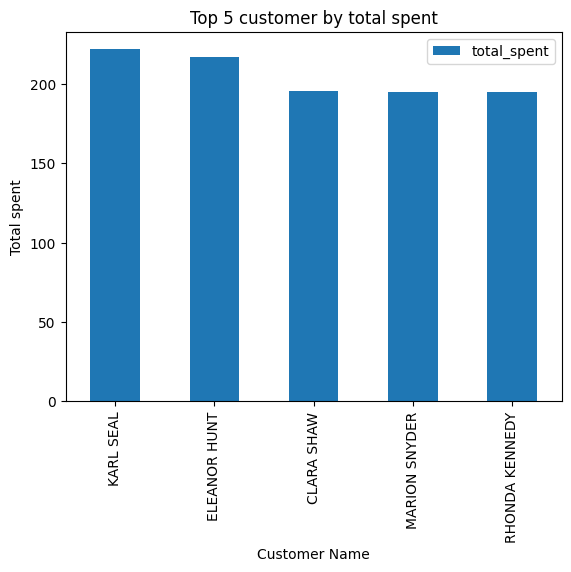

In [ ]:
import matplotlib.pyplot as plt

ax = top_five_customer.plot(
    x = "customer_name", 
    y = "total_spent", 
    kind="bar", 
    xlabel = "Customer Name", 
    ylabel = "Total spent", 
    title = "Top 5 customer by total spent"

)

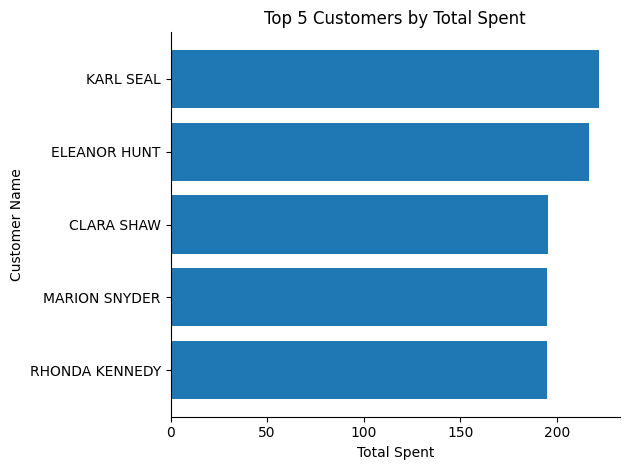

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.barh(y=top_five_customer["customer_name"], width=top_five_customer["total_spent"])
ax.invert_yaxis()
ax.set(
    xlabel="Total Spent",
    ylabel="Customer Name",
    title="Top 5 Customers by Total Spent",
)

ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()
fig.savefig("total_spent_top5_customer_hbar_png", dpi=150)

### b) How much money does each film category bring in? Make a bar chart showing total revenue per film category.

In [ ]:
category_revenue = query_sakila("""
    SELECT
        c.name AS category,
        SUM(p.amount) AS total_revenue
    FROM staging.payment p
    JOIN staging.rental r USING (rental_id)
    JOIN staging.inventory i USING (inventory_id)
    JOIN staging.film f USING (film_id)
    JOIN staging.film_category fc USING (film_id)
    JOIN staging.category c USING (category_id)
    GROUP BY category
    ORDER BY total_revenue DESC;
""")

category_revenue

,category,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


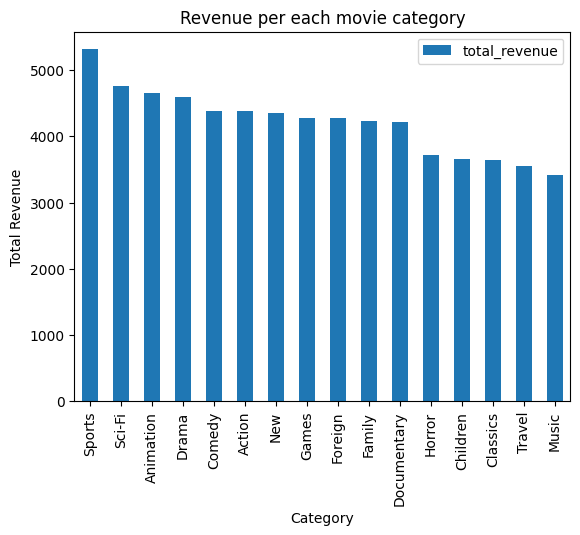

In [ ]:
import matplotlib.pyplot as plt

ax = category_revenue.plot(
    x = "category", 
    y = "total_revenue", 
    kind="bar", 
    xlabel = "Category", 
    ylabel = "Total Revenue", 
    title = "Revenue per each movie category"

)

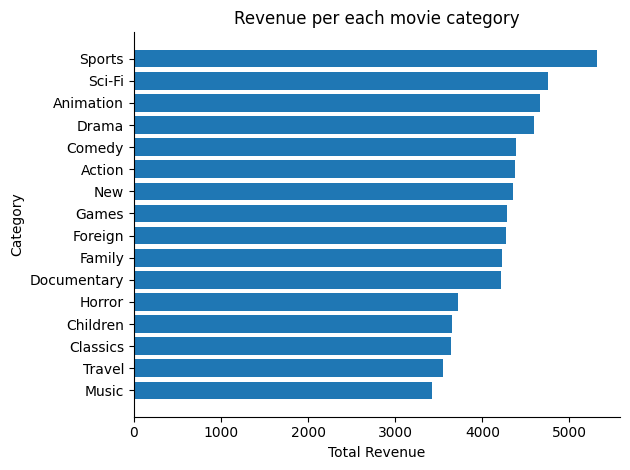

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.barh(y=category_revenue["category"], width=category_revenue["total_revenue"])
ax.invert_yaxis()
ax.set(
    xlabel="Total Revenue",
    ylabel="Category",
    title="Revenue per each movie category",
)

ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()
fig.savefig("total_revenue_per_category_hbar_png", dpi=150)